# GradBoost Model

### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np

print(f"pandas version: {pd.__version__}")
print(f"matplotlib version: {matplotlib.__version__}")
print(f"seaborn version: {sns.__version__}")
print(f"numpy version: {np.__version__}")

import sklearn
print(f"sklearn version: {sklearn.__version__}")

import sys
print(f"Python version: {sys.version}")

pandas version: 2.2.3
matplotlib version: 3.9.2
seaborn version: 0.13.2
numpy version: 1.26.4
sklearn version: 1.1.3
Python version: 3.9.21 (main, Dec 11 2024, 10:23:52) 
[Clang 14.0.6 ]


### Import data

In [2]:
players_all = pd.read_csv('../games_by_players_all.csv', encoding='utf8')
players_ranked = pd.read_csv('../games_by_players_ranked.csv', encoding='utf8')
players_pro = pd.read_csv('../games_by_players_pro.csv', encoding='utf8')

teams_all = pd.read_csv('../games_by_team_all_added_features.csv', encoding='utf8')
teams_ranked = pd.read_csv('../games_by_team_ranked_added_features.csv', encoding='utf8')
teams_pro = pd.read_csv('../games_by_team_pro_added_features.csv', encoding='utf8')

small_file = pd.read_csv('../small_csv_file.csv', encoding='utf8')

In [3]:
players_all = players_all.drop(columns = ['game_id', 'player_tag', 'pro'])
players_ranked = players_ranked.drop(columns = ['game_id', 'player_tag', 'pro'])
players_pro = players_pro.drop(columns = ['game_id', 'player_tag', 'pro'])

small_file = small_file.drop(columns = ['game_id', 'player_tag', 'pro'])

# Team
teams_all = teams_all.drop(columns = ['pro'])
teams_ranked = teams_ranked.drop(columns = ['pro'])
teams_pro = teams_pro.drop(columns = ['pro'])

In [4]:
players_all.head()

,movement_avg_speed,movement_total_distance,movement_time_supersonic_speed,movement_time_boost_speed,movement_time_slow_speed,movement_time_ground,movement_time_low_air,movement_time_high_air,movement_time_powerslide,movement_count_powerslide,...,positioning_percent_neutral_third,positioning_percent_defensive_half,positioning_percent_offensive_half,positioning_percent_behind_ball,positioning_percent_infront_ball,positioning_percent_most_back,positioning_percent_most_forward,positioning_percent_closest_to_ball,positioning_percent_farthest_from_ball,winner
0,1468.0,505882.0,40.34,142.29,196.16,219.80,143.43,15.56,8.01,68.0,...,26.72,83.53,16.47,75.83,24.17,31.88,28.71,39.66,28.51,False
1,1410.0,474841.0,41.74,122.11,208.83,248.88,115.01,8.80,5.41,30.0,...,24.45,79.52,20.48,67.56,32.44,31.06,36.93,31.49,32.85,False
2,1355.0,465999.0,35.87,119.38,223.64,212.03,145.07,21.79,7.24,36.0,...,26.17,80.77,19.23,67.72,32.28,37.22,32.79,27.29,38.78,False
3,1455.0,500485.0,41.75,130.76,206.38,231.33,123.58,23.97,5.61,49.0,...,29.87,54.02,45.98,77.37,22.63,28.14,44.34,41.22,29.30,True
4,1518.0,521069.0,50.22,149.49,179.09,241.24,128.04,9.51,3.34,32.0,...,35.38,61.49,38.51,79.66,20.34,29.56,30.44,30.15,34.75,True


### X,y division

In [5]:
X_players_all = players_all.iloc[:, 0:44]
X_players_ranked = players_ranked.iloc[:, 0:44]
X_players_pro = players_pro.iloc[:, 0:44]

X_small_file = small_file.iloc[:, 0:44]

In [6]:
y_players_all = players_all.iloc[:, 44]
y_players_ranked = players_ranked.iloc[:, 44]
y_players_pro = players_pro.iloc[:, 44]

y_small_file = small_file.iloc[:, 44]


In [7]:
# team
X_teams_all = teams_all.iloc[:, 0:200]
X_teams_ranked = teams_ranked.iloc[:, 0:200]
X_teams_pro = teams_pro.iloc[:, 0:200]

In [8]:
# Team
y_teams_all = teams_all.iloc[:, 200]
y_teams_ranked = teams_ranked.iloc[:, 200]
y_teams_pro = teams_pro.iloc[:, 200]

### Normalisation?

In [9]:
# Z-score
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_players_all_normalized = scaler.fit_transform(X_players_all)
X_players_ranked_normalized =  scaler.fit_transform(X_players_ranked)
X_players_pro_normalized = scaler.fit_transform(X_players_pro)
X_small_file_normalized = scaler.fit_transform(X_small_file)

X_players_all_normalized = pd.DataFrame(X_players_all_normalized, columns=X_players_all.columns)
X_players_ranked_normalized = pd.DataFrame(X_players_ranked_normalized, columns=X_players_ranked.columns)
X_players_pro_normalized = pd.DataFrame(X_players_pro_normalized, columns=X_players_pro.columns)
X_small_file_normalized = pd.DataFrame(X_small_file_normalized, columns=X_small_file.columns)

In [10]:
# Z-score for teams
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_teams_all_normalized = scaler.fit_transform(X_teams_all)
X_teams_ranked_normalized =  scaler.fit_transform(X_teams_ranked)
X_teams_pro_normalized = scaler.fit_transform(X_teams_pro)

X_teams_all_normalized = pd.DataFrame(X_teams_all_normalized, columns=X_teams_all.columns)
X_teams_ranked_normalized = pd.DataFrame(X_teams_ranked_normalized, columns=X_teams_ranked.columns)
X_teams_pro_normalized = pd.DataFrame(X_teams_pro_normalized, columns=X_teams_pro.columns)

In [11]:
X_players_ranked_normalized.head()

,movement_avg_speed,movement_total_distance,movement_time_supersonic_speed,movement_time_boost_speed,movement_time_slow_speed,movement_time_ground,movement_time_low_air,movement_time_high_air,movement_time_powerslide,movement_count_powerslide,...,positioning_percent_offensive_third,positioning_percent_neutral_third,positioning_percent_defensive_half,positioning_percent_offensive_half,positioning_percent_behind_ball,positioning_percent_infront_ball,positioning_percent_most_back,positioning_percent_most_forward,positioning_percent_closest_to_ball,positioning_percent_farthest_from_ball
0,-0.244786,-0.006564,-0.105950,-0.028138,0.536498,0.210515,0.345503,0.088237,0.262826,0.215025,...,-2.540903,-1.018220,2.796536,-2.796536,0.839287,-0.839287,-0.364511,-0.855038,1.348097,-1.015858
1,-0.864632,-0.373041,-0.027812,-0.758952,0.873504,0.984698,-0.750224,-0.864637,-0.613178,-1.117797,...,-1.971989,-1.597289,2.192010,-2.192010,-0.759975,0.759975,-0.497711,0.621517,-0.427544,-0.227942
2,-1.452418,-0.477431,-0.355434,-0.857818,1.267432,0.003658,0.408733,0.966403,0.003394,-0.907351,...,-2.304965,-1.158523,2.380453,-2.380453,-0.729034,0.729034,0.502915,-0.122149,-1.340359,0.848635
3,-0.383717,-0.070282,-0.027254,-0.445694,0.808337,0.517473,-0.419809,1.273691,-0.545793,-0.451386,...,2.113161,-0.214666,-1.652232,1.652232,1.137094,-1.137094,-0.972034,1.952572,1.687142,-0.872435
4,0.289565,0.172737,0.445481,0.232608,0.082456,0.781302,-0.247855,-0.764557,-1.310612,-1.047648,...,0.370265,1.190915,-0.526095,0.526095,1.579936,-1.579936,-0.741370,-0.544279,-0.718776,0.116999


### Train-test split

In [12]:
from sklearn.model_selection import train_test_split
import sklearn
print(f"sklearn version: {sklearn.__version__}")

sklearn version: 1.1.3


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_players_ranked_normalized, y_players_ranked, random_state=20, test_size=0.4)

In [14]:
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, random_state=20, test_size=0.5)

## Model

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

In [16]:
gbr = GradientBoostingClassifier(
    n_estimators=500,
    min_samples_split=10
)

In [17]:
# next is 1 min / met parameters meer dan 17 min / now is 4 min

In [18]:
gbr.fit(X_train, y_train)

GradientBoostingClassifier(min_samples_split=10, n_estimators=500)

### metrics

In [19]:
# next is 2 min / met parameter meer dan 63 min n_jobs=1 / n_jobs=-1 zou 6 x zo snel moeten gaan dan / now is 5 min

In [20]:
cross_val_score(gbr, X_train, y_train, cv=3, n_jobs=-1).mean()

0.6972365234406325

In [21]:
y_pred = gbr.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
y_pred = gbr.predict(X_test)
y_pred_classes = y_pred
y_test_classes = y_test
print("DNN Accuracy:", accuracy_score(y_test_classes, y_pred_classes))

DNN Accuracy: 0.7035076745416927


In [24]:
gbr.score(X_test, y_test)

0.7035076745416927

In [25]:
from sklearn.metrics import classification_report

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.70      0.70      0.70     10322
        True       0.71      0.70      0.70     10461

    accuracy                           0.70     20783
   macro avg       0.70      0.70      0.70     20783
weighted avg       0.70      0.70      0.70     20783



In [27]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [28]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("accuracy", accuracy)
print("recall", recall)
print("precision", precision)
print("f1", f1)

accuracy 0.7035076745416927
recall 0.7031832520791511
precision 0.7064246614808413
f1 0.7048002299511353


### Confusion matrix

In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
print(confusion_matrix(y_test, y_pred))

[[7265 3057]
 [3105 7356]]


[[7265 3057]
 [3105 7356]]
0.7035076745416927


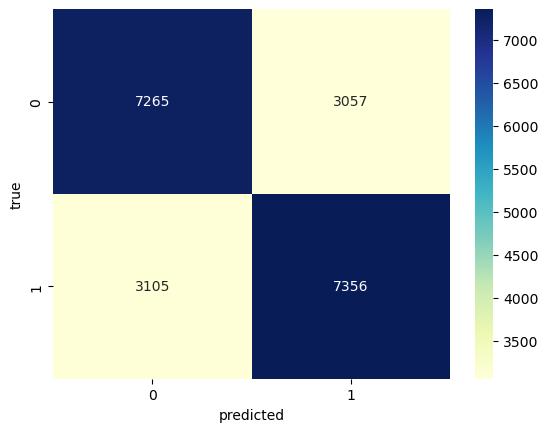

In [31]:
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(cm)
print(accuracy)
labels = list(y_train.keys())

s = sns.heatmap(cm, cmap='YlGnBu', annot=True, fmt=".0f")
s.set_xlabel("predicted")
s.set_ylabel("true")
plt.show()


## ROC curve

[0.11441466 0.3650892  0.76869271 0.54579104 0.58222631 0.79220984
 0.79340616 0.22325509 0.52335824 0.45343332 0.60294455 0.50171561
 0.08172351 0.89017661 0.7742607  0.91319874 0.25299084 0.37130872
 0.18228435 0.75493392 0.06445253 0.07853441 0.77759045 0.87176621
 0.55061859 0.4210469  0.58796825 0.41178186 0.2605967  0.55082454
 0.48497706 0.74706957 0.84734525 0.500854   0.35758383 0.68299941
 0.38250701 0.77752984 0.18506429 0.68107262 0.76483951 0.13884263
 0.18548565 0.82674181 0.13706488 0.47510402 0.3450763  0.73426664
 0.05284555 0.49660936 0.66898146 0.49396612 0.5869002  0.27350771
 0.23706429 0.91695782 0.22854572 0.56573482 0.59273425 0.10462153
 0.42434087 0.50525067 0.15621825 0.46727466 0.61363401 0.674668
 0.58556998 0.63925692 0.73898619 0.65731637 0.36956891 0.68374666
 0.06982055 0.74415984 0.56887334 0.3913033  0.64418452 0.33549892
 0.64259523 0.35470715 0.51606054 0.76173808 0.25777741 0.52272055
 0.67112337 0.16326991 0.21997522 0.45803257 0.44160649 0.466224

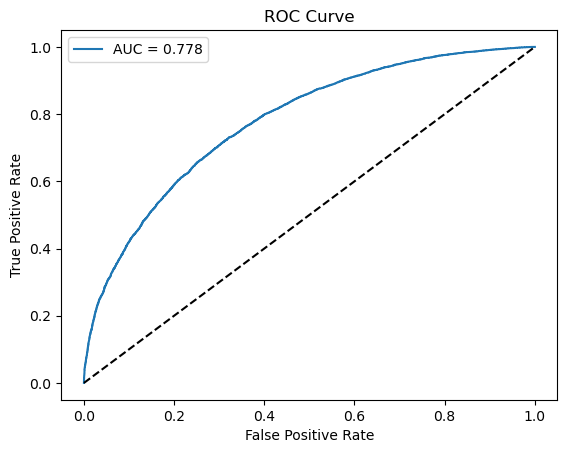

In [32]:
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_proba = gbr.predict_proba(X_test)[:, 1]
print(y_pred_proba[:100]) 

roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc:.3f}")

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### features

In [33]:
features = pd.DataFrame(gbr.feature_importances_, index = X_players_ranked.columns)

In [34]:
features.sort_values(0, ascending=False)

,0
positioning_percent_infront_ball,0.212265
positioning_percent_behind_ball,0.170882
positioning_time_infront_ball,0.106202
positioning_percent_most_forward,0.075080
positioning_time_most_forward,0.058641
positioning_percent_offensive_third,0.049528
positioning_percent_most_back,0.035642
positioning_avg_distance_to_ball_possession,0.031096
positioning_time_offensive_third,0.028832
positioning_time_most_back,0.027643


# Model 2 -------------------------------------------------

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

In [36]:
gbr2 = GradientBoostingClassifier(
    n_estimators=500,
    min_samples_split=10,
    learning_rate= 0.1,
    max_depth=7
)

In [37]:
# next is 1 min / now depth=7 is 16 min / depth=9 9 min

In [38]:
gbr2.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=7, min_samples_split=10, n_estimators=500)

### metrics

In [39]:
# next is 2 min / 11 min / 

In [40]:
cross_val_score(gbr2, X_train, y_train, cv=3, n_jobs=-1).mean()

0.6973969109368233

In [41]:
y_pred2 = gbr2.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score

In [43]:
y_pred2 = gbr2.predict(X_test)
y_pred_classes = y_pred2
y_test_classes = y_test
print("DNN Accuracy:", accuracy_score(y_test_classes, y_pred_classes))

DNN Accuracy: 0.7104364143771351


In [44]:
gbr2.score(X_test, y_test)

0.7104364143771351

In [45]:
from sklearn.metrics import classification_report

In [46]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

       False       0.71      0.71      0.71     10322
        True       0.71      0.71      0.71     10461

    accuracy                           0.71     20783
   macro avg       0.71      0.71      0.71     20783
weighted avg       0.71      0.71      0.71     20783



In [47]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [48]:
accuracy = accuracy_score(y_test, y_pred2)
recall = recall_score(y_test, y_pred2)
precision = precision_score(y_test, y_pred2)
f1 = f1_score(y_test, y_pred2)

print("accuracy", accuracy)
print("recall", recall)
print("precision", precision)
print("f1", f1)

accuracy 0.7104364143771351
recall 0.7109262976770864
precision 0.7129709519700892
f1 0.7119471568064332


### Confusion matrix

In [49]:
from sklearn.metrics import confusion_matrix

In [50]:
print(confusion_matrix(y_test, y_pred2))

[[7328 2994]
 [3024 7437]]


[[7328 2994]
 [3024 7437]]
0.7104364143771351


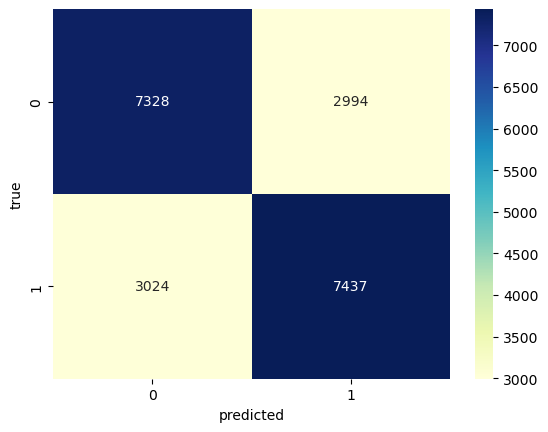

In [51]:
cm = confusion_matrix(y_test, y_pred2)
accuracy = accuracy_score(y_test, y_pred2)
print(cm)
print(accuracy)
labels = list(y_train.keys())

s = sns.heatmap(cm, cmap='YlGnBu', annot=True, fmt=".0f")
s.set_xlabel("predicted")
s.set_ylabel("true")
plt.show()


## ROC curve

[0.08893931 0.22613498 0.75444887 0.49838905 0.78754443 0.74947051
 0.82366314 0.27148174 0.74946139 0.13712187 0.59162331 0.42787575
 0.07503832 0.9427587  0.79380472 0.9668915  0.13043365 0.51970874
 0.40145351 0.68440089 0.07589464 0.06979562 0.43175883 0.84407249
 0.39793511 0.33635626 0.55720657 0.20549881 0.09482247 0.59203234
 0.6342573  0.91687903 0.82292882 0.71009384 0.33638733 0.61447874
 0.32694234 0.30270856 0.18390459 0.80829269 0.87732357 0.16230648
 0.12099368 0.77365232 0.06993687 0.34742059 0.45203801 0.8122087
 0.0307571  0.51306579 0.71761158 0.56292503 0.52498601 0.27830675
 0.17865708 0.96614348 0.09085281 0.55413102 0.50651452 0.06106386
 0.41707955 0.69731356 0.13456318 0.47287153 0.58686177 0.84240424
 0.47066442 0.78090332 0.88943651 0.56703236 0.35788148 0.7174801
 0.04719771 0.93399707 0.55910138 0.25806021 0.52195033 0.36895656
 0.56512268 0.25323288 0.3251368  0.96160694 0.17643199 0.51281821
 0.84068837 0.1489037  0.15428736 0.47545883 0.44062487 0.402643

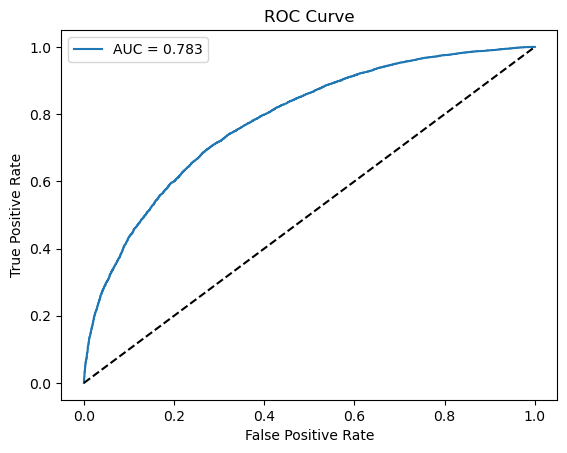

In [52]:
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_proba = gbr2.predict_proba(X_test)[:, 1]
print(y_pred_proba[:100]) 

roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc:.3f}")

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### features

In [53]:
features = pd.DataFrame(gbr2.feature_importances_, index = X_players_ranked.columns)

In [54]:
features.sort_values(0, ascending=False)

,0
positioning_percent_infront_ball,0.142792
positioning_percent_most_forward,0.063683
positioning_percent_behind_ball,0.050522
positioning_time_infront_ball,0.041656
positioning_avg_distance_to_ball_possession,0.034706
positioning_percent_most_back,0.034086
positioning_percent_offensive_third,0.033232
positioning_time_most_forward,0.031160
positioning_time_offensive_third,0.026807
positioning_avg_distance_to_ball_no_possession,0.026201
